#Predict loan quality 

Target Variable: **payFrequency**

**Note: Data Visualization completed using Tableau.** 

Steps included in the task:

1. Import and merge the three datasets

2. Initial Data Exploration (Understand datatypes, find missing values)

3. Missing Value Treatment 

4. Renaming the columns and transform the date and time

5. Data Transformation (Feature Scalling and Normalization)

6. Detect amd Treat Outliers 

7. Label Encoding

8. Check for Multicolinearity

9. Check the significance level

10. Check the class for the target variable

11. Class Balancing

12. Train Test Split

13. Model Building 

14. Evaluation Metrics 


# Load Dependencies

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c397649623db791ffb9808bc46f7c633cdb24e1d646964ed9e99be0ca75277f6
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as train_test_split 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Import and Combine Datasets (Loan , Payment, Clarity_underwriting)

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/loan.csv')
df2= pd.read_csv('/content/drive/MyDrive/payment.csv')
df3= pd.read_csv('/content/drive/MyDrive/clarity_underwriting_variables.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      689364 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  49750

##Combine the Loan with Payment dataset 

In [ ]:
merged_df = pd.merge(df1, df2, on='loanId')

In [ ]:
merged_df.info()   #payment+loan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689364 entries, 0 to 689363
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            689364 non-null  object 
 1   anon_ssn                          689364 non-null  object 
 2   payFrequency                      689364 non-null  object 
 3   apr                               689364 non-null  float64
 4   applicationDate                   689364 non-null  object 
 5   originated                        689364 non-null  bool   
 6   originatedDate                    689095 non-null  object 
 7   nPaidOff                          688981 non-null  float64
 8   approved                          689364 non-null  bool   
 9   isFunded                          689364 non-null  int64  
 10  loanStatus                        689364 non-null  object 
 11  loanAmount                        689364 non-null  f

## Join the clarity_underwriting_variables.csv  with the clarityFraudId in merged dataset.

In [ ]:
# rename the underwritingid column clarityFraudId 

df3 = df3.rename(columns={'underwritingid': 'clarityFraudId'})


In [ ]:
df = pd.merge(merged_df, df3, on='clarityFraudId')

In [ ]:
#save to new csv 

df.to_csv("/content/drive/MyDrive/NEWDATASET.csv")

# Initial Data Exploration  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558326 entries, 0 to 558325
Data columns (total 80 columns):
 #   Column                                                                                               Non-Null Count   Dtype  
---  ------                                                                                               --------------   -----  
 0   loanId                                                                                               558326 non-null  object 
 1   anon_ssn                                                                                             558326 non-null  object 
 2   payFrequency                                                                                         558326 non-null  object 
 3   apr                                                                                                  558326 non-null  float64
 4   applicationDate                                                                                   

In [ ]:
df.describe()

apr       nPaidOff       isFunded     loanAmount  \
count  558326.000000  558292.000000  558326.000000  558326.000000   
mean      525.787242       0.169420       0.995977     707.755771   
std       135.164389       0.584574       0.063297     603.181174   
min        29.990000       0.000000       0.000000     100.000000   
25%       390.000000       0.000000       1.000000     400.000000   
50%       590.000000       0.000000       1.000000     500.000000   
75%       625.000000       0.000000       1.000000     750.000000   
max       681.000000      20.000000       1.000000    4687.000000   

       originallyScheduledPaymentAmount       leadCost     hasCF  \
count                     558326.000000  558326.000000  558326.0   
mean                        1958.652569      13.472516       1.0   
std                         1622.431766      22.117607       0.0   
min                          188.410000       0.000000       1.0   
25%                         1089.960000       3.000000       1.0   
50%                         1447.600000       6.000000       1.0   
75%                         2098.140000      25.000000       1.0   
max                        16868.150000     200.000000       1.0   

       installmentIndex      principal           fees  ...  \
count     558326.000000  558326.000000  558326.000000  ...   
mean          10.493575      46.043477      68.480188  ...   
std            7.960758      82.564841      61.063006  ...   
min            1.000000    -303.370000     -34.330000  ...   
25%            5.000000      13.100000      29.770000  ...   
50%            9.000000      27.950000      52.610000  ...   
75%           14.000000      54.090000      87.920000  ...   
max          105.000000    4000.000000    1257.710000  ...   

       .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago  \
count                                      558302.000000                  
mean                                            3.965094                  
std                                             2.681662                  
min                                             0.000000                  
25%                                             3.000000                  
50%                                             3.000000                  
75%                                             5.000000                  
max                                            35.000000                  

       .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago  \
count                                      558302.000000                     
mean                                           10.369057                     
std                                            10.379349                     
min                                             0.000000                     
25%                                             4.000000                     
50%                                             7.000000                     
75%                                            13.000000                     
max                                           143.000000                     

       .underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago  \
count                                      558302.000000                    
mean                                            5.410749                    
std                                             4.141699                    
min                                             0.000000                    
25%                                             3.000000                    
50%                                             4.000000                    
75%                                             6.000000                    
max                                            64.000000                    

       .underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago  \
count                                      558302.000000                

In [ ]:
df.size

44666080

In [ ]:
df.duplicated().any()

False

## Spot For Missing Values in the dataset

In [ ]:
df.isnull().sum()   #we can remove those with null 

loanId                                                                                            0
anon_ssn                                                                                          0
payFrequency                                                                                      0
apr                                                                                               0
applicationDate                                                                                   0
                                                                                              ...  
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode         529139
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode     495226
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch                  439
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode       439


In [ ]:
print(df.isnull().values.sum() != 0) #datasets having missing values.

True


In [ ]:
#See the percentage of missing values in each column

missing_percentages = df.isnull().sum() / len(df) * 100

print(missing_percentages)

loanId                                                                                        0.000000
anon_ssn                                                                                      0.000000
payFrequency                                                                                  0.000000
apr                                                                                           0.000000
applicationDate                                                                               0.000000
                                                                                               ...    
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode         94.772409
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode     88.698359
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch                0.078628
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overal

In [ ]:
# based on the percentages above, we can remove those columns that have more than 30%... 

## Remove columns that have more than 30% missing values 


In [ ]:
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode'])


In [ ]:
missing_percentages = df.isnull().sum() / len(df) * 100

print(missing_percentages)

loanId                                                                                        0.000000
anon_ssn                                                                                      0.000000
payFrequency                                                                                  0.000000
apr                                                                                           0.000000
applicationDate                                                                               0.000000
                                                                                               ...    
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype                 96.972020
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode          81.281724
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch                0.078628
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overal

In [ ]:
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode'])
df = df.drop(columns=['paymentReturnCode'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription'])

In [ ]:
missing_percentages = df.isnull().sum() / len(df) * 100

print(missing_percentages)

loanId                                                    0.0
anon_ssn                                                  0.0
payFrequency                                              0.0
apr                                                       0.0
nPaidOff                                                  0.0
approved                                                  0.0
isFunded                                                  0.0
loanStatus                                                0.0
loanAmount                                                0.0
state                                                     0.0
leadType                                                  0.0
leadCost                                                  0.0
fpStatus                                                  0.0
installmentIndex                                          0.0
isCollection                                              0.0
paymentAmount                                             0.0
paymentS

In [ ]:
#all the columns that contains missing values of 30% or more are removed. 

# Missing Value Treatment for numerical and categorical variables.

##Mean Imputation (Numerical Variables)

In [ ]:
num_missing = df.select_dtypes(include='number').isnull().sum()
num_missing = num_missing[num_missing > 0]
print(num_missing)

nPaidOff                                                                                       34
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                            24
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                       24
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                             24
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                               24
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                            24
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                             24
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                            24
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                           24
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                    24
.underwritingdatacla

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago 

mean = df['.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators 

mean = df['.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount 

mean = df['.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount'].fillna(mean, inplace=True)

In [ ]:
#.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode 

mean = df['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode'].mean()

df['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode'].fillna(mean, inplace=True)

In [ ]:
#clearfraudscore

mean = df['clearfraudscore'].mean()

df['clearfraudscore'].fillna(mean, inplace=True)

In [ ]:
#nPaidOff

mean = df['nPaidOff'].mean()

df['nPaidOff'].fillna(mean, inplace=True)

##Mode Imputation for Categorical Variable

In [ ]:
#Count the missing values in each categorical variables

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_missing = df[cat_cols].isnull().sum()
cat_missing = cat_missing[cat_missing > 0]
print(cat_missing)

originatedDate                                                                                         218
fpStatus                                                                                              2314
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict            580
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress         580
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate              580
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious                          580
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential                   580
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk                          580
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother            580
.underwritingdataclarity.clearfraud.c

In [ ]:
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype'])
df = df.drop(columns=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription'])


Reason of removing because it seems to have too many missing values within the columns. 

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_missing = df[cat_cols].isnull().sum()
cat_missing = cat_missing[cat_missing > 0]
print(cat_missing)

originatedDate                                                                                        218
fpStatus                                                                                             2314
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict           580
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress        580
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate             580
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious                         580
.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential                  580
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk                         580
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother           580
.underwritingdataclarity.clearfraud.clearfraud

In [ ]:
def mode_impute(df, cat_cols):
  df_copy= df.copy()
 
  imputer = SimpleImputer(strategy='most_frequent')
  df_copy[cat_cols] = imputer.fit_transform(df_copy[cat_cols])
  
  return df_copy

In [ ]:
cat_cols = ['originatedDate', 'fpStatus', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict','.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress','.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious','.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential','.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother','.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid','.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified','.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days','.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate','.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk','.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified','.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased','.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly',
            '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18', '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch','.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch','.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult',
            '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch']
df = mode_impute(df, cat_cols)

##Check if there is any missing value left

In [ ]:
print(df.isnull().values.sum() != 0) 

False


The missing values has been imputed 

# Rename Column Names

In [ ]:
#change the .underwritingdataclarity.clearfraud.clearfraudindicator. to cf_Indicator_ , to shorten the column name 

def change_column_name(column_name):
    if '.underwritingdataclarity.clearfraud.clearfraudindicator.' in column_name:
        column_name = column_name.replace('.underwritingdataclarity.clearfraud.clearfraudindicator.', 'cf_Indicator_')
    return column_name


In [ ]:
df = df.rename(columns=change_column_name)

In [ ]:
#change the .underwritingdataclarity.clearfraud.clearfraudidentityverification. to cf_IdentityVerification_ , to shorten the column name 

def change_column_name(column_name):
    if '.underwritingdataclarity.clearfraud.clearfraudidentityverification.' in column_name:
        column_name = column_name.replace('.underwritingdataclarity.clearfraud.clearfraudidentityverification.', 'cf_IdentityVerification_')
    return column_name


In [ ]:
df = df.rename(columns=change_column_name)

In [ ]:
#change the .underwritingdataclarity.clearfraud.clearfraudinquiry. to cf_ClearFruadInquiry_ , to shorten the column name 

def change_column_name(column_name):
    if '.underwritingdataclarity.clearfraud.clearfraudinquiry.' in column_name:
        column_name = column_name.replace('.underwritingdataclarity.clearfraud.clearfraudinquiry.', 'cf_ClearFruadInquiry_')
    return column_name


In [ ]:
df = df.rename(columns=change_column_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558326 entries, 0 to 558325
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  558326 non-null  object 
 1   anon_ssn                                                558326 non-null  object 
 2   payFrequency                                            558326 non-null  object 
 3   apr                                                     558326 non-null  float64
 4   applicationDate                                         558326 non-null  object 
 5   originated                                              558326 non-null  bool   
 6   originatedDate                                          558326 non-null  object 
 7   nPaidOff                                                558326 non-null  float64
 8   approved                

In [ ]:
df.to_csv("/content/drive/MyDrive/NEWDATASET.csv")

## Change date time to numerical

In [ ]:
def convert_to_numeric(date_str):
    if pd.isnull(date_str):
        return None
    try:
        date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%f')
    except ValueError:
        date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S')
    date_numeric = (date_obj - datetime(1970, 1, 1)).total_seconds()
    return date_numeric

In [ ]:
df['applicationDate'] = df['applicationDate'].apply(convert_to_numeric)
df['originatedDate'] = df['originatedDate'].apply(convert_to_numeric)
df['paymentDate'] = df['paymentDate'].apply(convert_to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558326 entries, 0 to 558325
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  558326 non-null  object 
 1   anon_ssn                                                558326 non-null  object 
 2   payFrequency                                            558326 non-null  object 
 3   apr                                                     558326 non-null  float64
 4   applicationDate                                         558326 non-null  float64
 5   originated                                              558326 non-null  bool   
 6   originatedDate                                          558326 non-null  float64
 7   nPaidOff                                                558326 non-null  float64
 8   approved                

# Data Transforming- Feature scaling & Outlier Treatment

##Feature Scaling

In [ ]:
#Checking the Ranges of the independent variables and dependent variable 
plt.figure(figsize=(20,7))
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df)

<AxesSubplot:>

Because the ranges are not balanced we will use normlalization technique to balance up the ranges 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558326 entries, 0 to 558325
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  558326 non-null  object 
 1   anon_ssn                                                558326 non-null  object 
 2   payFrequency                                            558326 non-null  object 
 3   apr                                                     558326 non-null  float64
 4   applicationDate                                         558326 non-null  float64
 5   originated                                              558326 non-null  bool   
 6   originatedDate                                          558326 non-null  float64
 7   nPaidOff                                                558326 non-null  float64
 8   approved                

##Min Max Normalization - Run this

In [ ]:
scaler = MinMaxScaler()

num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for col in num_cols:
    df[col] = scaler.fit_transform(df[[col]])

<AxesSubplot:>

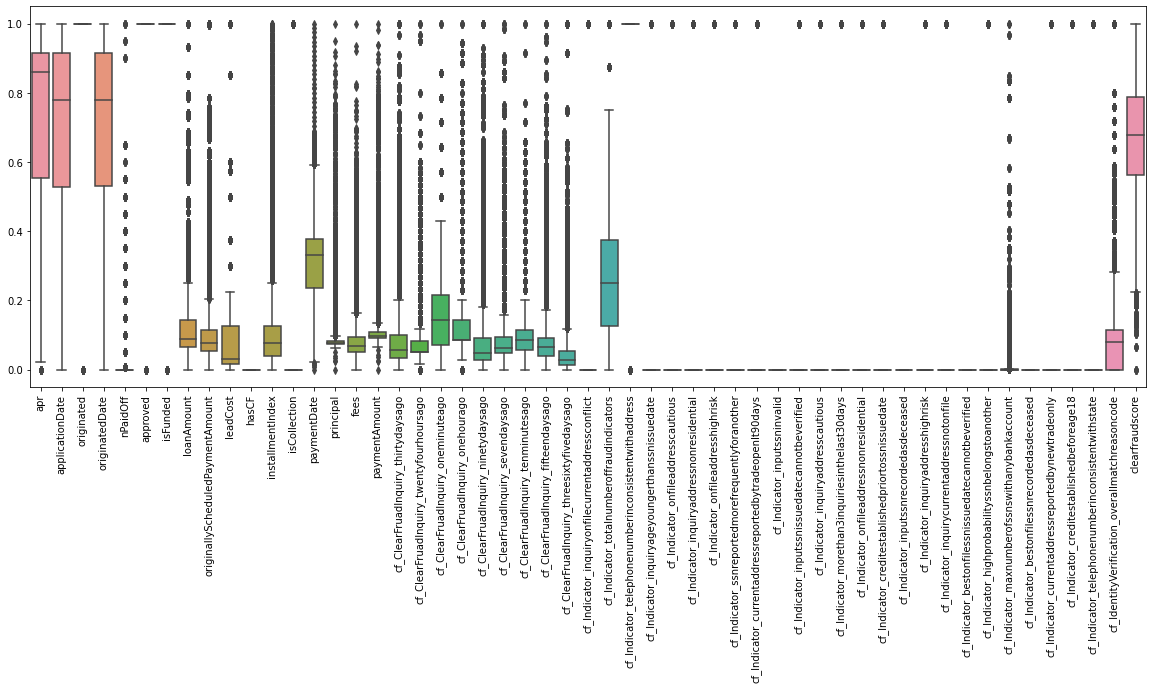

In [ ]:
#Checking the Ranges 
plt.figure(figsize=(20,7))
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df)

## Outlier treatment

In [ ]:
#First count the outliers in each of the column. 

def count_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return col[(col < lower_bound) | (col > upper_bound)].count()

# Create a list of numerical columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Count outliers in each column
outlier_counts = df[num_cols].apply(count_outliers)
pd.options.display.max_rows = None
print(outlier_counts)


apr                                                  33
applicationDate                                       0
originatedDate                                        0
nPaidOff                                          68039
isFunded                                           2246
loanAmount                                        49986
originallyScheduledPaymentAmount                  48534
leadCost                                          23534
hasCF                                                 0
installmentIndex                                  10401
paymentDate                                         697
principal                                         38642
fees                                              32274
paymentAmount                                     36230
cf_ClearFruadInquiry_thirtydaysago                30431
cf_ClearFruadInquiry_twentyfourhoursago           68641
cf_ClearFruadInquiry_oneminuteago                  4306
cf_ClearFruadInquiry_onehourago                 

Because the frequencies of the outliers in each column is high. We will first check if the the outliers are valid data points anot. #not all are remove.

##Remove Outliers

In [ ]:
col_name = 'loanAmount'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

df = remove_outliers(df, col_name)

In [ ]:
col_name = 'leadCost'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

df = remove_outliers(df, col_name)

In [ ]:
col_name = 'fees'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df
    
df = remove_outliers(df, col_name)

In [ ]:
col_name = 'principal'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

df = remove_outliers(df, col_name)

In [ ]:
col_name = 'paymentAmount'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


df = remove_outliers(df, col_name)

In [ ]:
col_name = 'apr'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


df = remove_outliers(df, col_name)

In [ ]:
col_name = 'clearfraudscore'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


df = remove_outliers(df, col_name)

In [ ]:
col_name = 'installmentIndex'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


df = remove_outliers(df, col_name)

In [ ]:
col_name = 'originallyScheduledPaymentAmount'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

df = remove_outliers(df, col_name)

In [ ]:
col_name = 'cf_IdentityVerification_overallmatchreasoncode'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


df = remove_outliers(df, col_name)

In [ ]:
col_name = 'paymentDate'

def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

df = remove_outliers(df, col_name)

# Label Encoding

In [ ]:
#originated 

label_encoder = preprocessing.LabelEncoder()
  
df['originated']= label_encoder.fit_transform(df['originated'])
  
df['originated'].unique()

array([1, 0])

In [ ]:
#payFrequency 

label_encoder = preprocessing.LabelEncoder()
  
df['payFrequency']= label_encoder.fit_transform(df['payFrequency'])
  
df['payFrequency'].unique()

array([3, 4, 0, 2, 1])

In [ ]:
#approved 

label_encoder = preprocessing.LabelEncoder()
  
df['approved']= label_encoder.fit_transform(df['approved'])
  
df['approved'].unique()

array([1, 0])

In [ ]:
#loanStatus 
  
label_encoder = preprocessing.LabelEncoder()
  
df['loanStatus']= label_encoder.fit_transform(df['loanStatus'])
  
df['loanStatus'].unique()

array([ 7,  4,  5,  6,  8,  9, 10,  2, 11,  3,  1, 12,  0])

In [ ]:
#state 

label_encoder = preprocessing.LabelEncoder()
  
df['state']= label_encoder.fit_transform(df['state'])
  
df['state'].unique()

array([17, 36, 29, 25, 24, 11, 22, 34,  6, 10, 26, 32, 19, 31,  7, 13,  1,
        9, 20,  3,  2, 15, 27, 16, 23, 18, 14, 12,  8, 30,  4, 33, 35, 21,
       28,  5, 37,  0])

In [ ]:
#nPaidOff 

label_encoder = preprocessing.LabelEncoder()
  
df['nPaidOff']= label_encoder.fit_transform(df['nPaidOff'])
  
df['nPaidOff'].unique()

array([ 1,  0,  3,  4,  2,  6,  5,  8,  7, 10,  9])

In [ ]:
#leadType 
  
label_encoder = preprocessing.LabelEncoder()
  
df['leadType']= label_encoder.fit_transform(df['leadType'])
  
df['leadType'].unique()

array([3, 0, 2, 4, 5, 1])

In [ ]:
#fpStatus 

label_encoder = preprocessing.LabelEncoder()
  
df['fpStatus']= label_encoder.fit_transform(df['fpStatus'])
  
df['fpStatus'].unique()

array([1, 2, 3, 0])

In [ ]:
#clarityFraudId 
  
label_encoder = preprocessing.LabelEncoder()
  
df['clarityFraudId']= label_encoder.fit_transform(df['clarityFraudId'])
  
df['clarityFraudId'].unique()

array([10093,  2712,   392, ...,  6052,  2737,  9734])

In [ ]:
#anon_ssn 

label_encoder = preprocessing.LabelEncoder()

df['anon_ssn']= label_encoder.fit_transform(df['anon_ssn'])
  
df['anon_ssn'].unique()

array([10405,  1613, 13099, ..., 12888, 10871,   239])

In [ ]:
#loanId 
  
label_encoder = preprocessing.LabelEncoder()
  
df['loanId']= label_encoder.fit_transform(df['loanId'])
  
df['loanId'].unique()

array([13473, 10310,  6151, ...,  6095,  2365, 11686])

In [ ]:
#isCollection 
  
label_encoder = preprocessing.LabelEncoder()
  
df['isCollection']= label_encoder.fit_transform(df['isCollection'])
  
df['isCollection'].unique()

array([0, 1])

In [ ]:
#paymentStatus 
  
label_encoder = preprocessing.LabelEncoder()
  
df['paymentStatus']= label_encoder.fit_transform(df['paymentStatus'])
  
df['paymentStatus'].unique()

array([0, 1, 4, 2, 3, 6, 5])

In [ ]:
#cf_Indicator_inquiryonfilecurrentaddressconflict 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquiryonfilecurrentaddressconflict']= label_encoder.fit_transform(df['cf_Indicator_inquiryonfilecurrentaddressconflict'])
  
df['cf_Indicator_inquiryonfilecurrentaddressconflict'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_telephonenumberinconsistentwithaddress 
  
label_encoder = preprocessing.LabelEncoder()

df['cf_Indicator_telephonenumberinconsistentwithaddress']= label_encoder.fit_transform(df['cf_Indicator_telephonenumberinconsistentwithaddress'])
  
df['cf_Indicator_telephonenumberinconsistentwithaddress'].unique()

array([1, 0])

In [ ]:
#cf_Indicator_telephonenumberinconsistentwithaddress 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquiryageyoungerthanssnissuedate']= label_encoder.fit_transform(df['cf_Indicator_inquiryageyoungerthanssnissuedate'])
  
df['cf_Indicator_inquiryageyoungerthanssnissuedate'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_onfileaddresscautious 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_onfileaddresscautious']= label_encoder.fit_transform(df['cf_Indicator_onfileaddresscautious'])
  
df['cf_Indicator_onfileaddresscautious'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_onfileaddresshighrisk 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_onfileaddresshighrisk']= label_encoder.fit_transform(df['cf_Indicator_onfileaddresshighrisk'])
  
df['cf_Indicator_onfileaddresshighrisk'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_ssnreportedmorefrequentlyforanother 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_ssnreportedmorefrequentlyforanother']= label_encoder.fit_transform(df['cf_Indicator_ssnreportedmorefrequentlyforanother'])
  
df['cf_Indicator_ssnreportedmorefrequentlyforanother'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_currentaddressreportedbytradeopenlt90days 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_currentaddressreportedbytradeopenlt90days']= label_encoder.fit_transform(df['cf_Indicator_currentaddressreportedbytradeopenlt90days'])
  
df['cf_Indicator_currentaddressreportedbytradeopenlt90days'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_inputssninvalid 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inputssninvalid']= label_encoder.fit_transform(df['cf_Indicator_inputssninvalid'])
  
df['cf_Indicator_inputssninvalid'].unique()

array([0])

In [ ]:
#cf_Indicator_inputssnissuedatecannotbeverified 

label_encoder = preprocessing.LabelEncoder()

df['cf_Indicator_inputssnissuedatecannotbeverified']= label_encoder.fit_transform(df['cf_Indicator_inputssnissuedatecannotbeverified'])
  
df['cf_Indicator_inputssnissuedatecannotbeverified'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_inquiryaddresscautious 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquiryaddresscautious']= label_encoder.fit_transform(df['cf_Indicator_inquiryaddresscautious'])
  
df['cf_Indicator_inquiryaddresscautious'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_morethan3inquiriesinthelast30days 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_morethan3inquiriesinthelast30days']= label_encoder.fit_transform(df['cf_Indicator_morethan3inquiriesinthelast30days'])
  
df['cf_Indicator_morethan3inquiriesinthelast30days'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_onfileaddressnonresidential 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_onfileaddressnonresidential']= label_encoder.fit_transform(df['cf_Indicator_onfileaddressnonresidential'])
  
df['cf_Indicator_onfileaddressnonresidential'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_creditestablishedpriortossnissuedate 
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_creditestablishedpriortossnissuedate']= label_encoder.fit_transform(df['cf_Indicator_creditestablishedpriortossnissuedate'])
  
df['cf_Indicator_creditestablishedpriortossnissuedate'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_inputssnrecordedasdeceased 

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inputssnrecordedasdeceased']= label_encoder.fit_transform(df['cf_Indicator_inputssnrecordedasdeceased'])
  
df['cf_Indicator_inputssnrecordedasdeceased'].unique()

array([0])

In [ ]:
#cf_Indicator_inquiryaddresshighrisk

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquiryaddresshighrisk']= label_encoder.fit_transform(df['cf_Indicator_inquiryaddresshighrisk'])
  
df['cf_Indicator_inquiryaddresshighrisk'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_inquirycurrentaddressnotonfile
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquirycurrentaddressnotonfile']= label_encoder.fit_transform(df['cf_Indicator_inquirycurrentaddressnotonfile'])
  
df['cf_Indicator_inquirycurrentaddressnotonfile'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_bestonfilessnissuedatecannotbeverified
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_bestonfilessnissuedatecannotbeverified']= label_encoder.fit_transform(df['cf_Indicator_bestonfilessnissuedatecannotbeverified'])
  
df['cf_Indicator_bestonfilessnissuedatecannotbeverified'].unique()

array([0])

In [ ]:
#cf_Indicator_highprobabilityssnbelongstoanother

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_highprobabilityssnbelongstoanother']= label_encoder.fit_transform(df['cf_Indicator_highprobabilityssnbelongstoanother'])
  
df['cf_Indicator_highprobabilityssnbelongstoanother'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_bestonfilessnrecordedasdeceased

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_bestonfilessnrecordedasdeceased']= label_encoder.fit_transform(df['cf_Indicator_bestonfilessnrecordedasdeceased'])
  
df['cf_Indicator_bestonfilessnrecordedasdeceased'].unique()

array([0])

In [ ]:
#cf_Indicator_currentaddressreportedbynewtradeonly

label_encoder = preprocessing.LabelEncoder()

df['cf_Indicator_currentaddressreportedbynewtradeonly']= label_encoder.fit_transform(df['cf_Indicator_currentaddressreportedbynewtradeonly'])
  
df['cf_Indicator_currentaddressreportedbynewtradeonly'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_creditestablishedbeforeage18
  
label_encoder = preprocessing.LabelEncoder()

df['cf_Indicator_creditestablishedbeforeage18']= label_encoder.fit_transform(df['cf_Indicator_creditestablishedbeforeage18'])
  
df['cf_Indicator_creditestablishedbeforeage18'].unique()

array([0, 1])

In [ ]:
#cf_Indicator_telephonenumberinconsistentwithstate

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_telephonenumberinconsistentwithstate']= label_encoder.fit_transform(df['cf_Indicator_telephonenumberinconsistentwithstate'])
  
df['cf_Indicator_telephonenumberinconsistentwithstate'].unique()

array([0, 1])

In [ ]:
#cf_IdentityVerification_ssnnamematch
  
label_encoder = preprocessing.LabelEncoder()

df['cf_IdentityVerification_ssnnamematch']= label_encoder.fit_transform(df['cf_IdentityVerification_ssnnamematch'])
  
df['cf_IdentityVerification_ssnnamematch'].unique()

array([0, 1])

In [ ]:
#cf_IdentityVerification_nameaddressmatch
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_IdentityVerification_nameaddressmatch']= label_encoder.fit_transform(df['cf_IdentityVerification_nameaddressmatch'])
  
df['cf_IdentityVerification_nameaddressmatch'].unique()

array([3, 1, 4, 2, 0])

In [ ]:
#cf_IdentityVerification_phonematchresult
  
label_encoder = preprocessing.LabelEncoder()
  
df['cf_IdentityVerification_phonematchresult']= label_encoder.fit_transform(df['cf_IdentityVerification_phonematchresult'])
  
df['cf_IdentityVerification_phonematchresult'].unique()

array([4, 3, 1, 0, 2])

In [ ]:
#cf_IdentityVerification_overallmatchresult

label_encoder = preprocessing.LabelEncoder()

df['cf_IdentityVerification_overallmatchresult']= label_encoder.fit_transform(df['cf_IdentityVerification_overallmatchresult'])
  
df['cf_IdentityVerification_overallmatchresult'].unique()

array([1, 0])

In [ ]:
#cf_Indicator_inquiryaddressnonresidential

label_encoder = preprocessing.LabelEncoder()
  
df['cf_Indicator_inquiryaddressnonresidential']= label_encoder.fit_transform(df['cf_Indicator_inquiryaddressnonresidential'])
  
df['cf_Indicator_inquiryaddressnonresidential'].unique()

array([0, 1])

In [ ]:
#cf_IdentityVerification_ssndobmatch

label_encoder = preprocessing.LabelEncoder()
  
df['cf_IdentityVerification_ssndobmatch']= label_encoder.fit_transform(df['cf_IdentityVerification_ssndobmatch'])
  
df['cf_IdentityVerification_ssndobmatch'].unique()

array([1, 3, 0, 4, 2])

Removing those categorical vairable that only having one class. Because it does not affect or give extra information to the prediction. 

In [ ]:
df = df.drop(columns=['cf_Indicator_bestonfilessnrecordedasdeceased'])
df = df.drop(columns=['cf_Indicator_bestonfilessnissuedatecannotbeverified'])
df = df.drop(columns=['cf_Indicator_inputssnrecordedasdeceased'])
df = df.drop(columns=['cf_Indicator_inputssninvalid'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254385 entries, 77 to 558325
Data columns (total 63 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  254385 non-null  int64  
 1   anon_ssn                                                254385 non-null  int64  
 2   payFrequency                                            254385 non-null  int64  
 3   apr                                                     254385 non-null  float64
 4   applicationDate                                         254385 non-null  float64
 5   originated                                              254385 non-null  int64  
 6   originatedDate                                          254385 non-null  float64
 7   nPaidOff                                                254385 non-null  int64  
 8   approved               

In [ ]:
df.to_csv("/content/drive/MyDrive/NEWDATASET.csv")

#Check Multicollinearity

In [ ]:
#payFrequency is the target variable

In [ ]:
df.corr()

loanId  anon_ssn  \
loanId                                              1.000000  0.009940   
anon_ssn                                            0.009940  1.000000   
payFrequency                                        0.020936  0.010762   
apr                                                 0.237844  0.009560   
applicationDate                                     0.979183  0.012457   
originated                                         -0.012487 -0.005638   
originatedDate                                      0.978720  0.012460   
nPaidOff                                            0.016029 -0.011560   
approved                                           -0.012487 -0.005638   
isFunded                                            0.009165 -0.003556   
loanStatus                                          0.034205  0.000414   
loanAmount                                         -0.015328  0.001090   
originallyScheduledPaymentAmount                    0.179799  0.006086   
state                                              -0.096139  0.001821   
leadType                                            0.032577  0.009637   
leadCost                                           -0.117124 -0.019235   
fpStatus                                           -0.002799 -0.000549   
clarityFraudId                                      0.965023  0.009918   
hasCF                                                    NaN       NaN   
installmentIndex                                   -0.007212  0.004205   
isCollection                                       -0.064186 -0.000168   
paymentDate                                         0.940796  0.011984   
principal                                          -0.029915 -0.004436   
fees                                                0.114768 -0.001582   
paymentAmount                                       0.087572 -0.004110   
paymentStatus                                       0.142938  0.003277   
cf_ClearFruadInquiry_thirtydaysago                 -0.176330 -0.013142   
cf_ClearFruadInquiry_twentyfourhoursago            -0.099815 -0.013891   
cf_ClearFruadInquiry_oneminuteago                   0.142659  0.014834   
cf_ClearFruadInquiry_onehourago                    -0.044824 -0.016077   
cf_ClearFruadInquiry_ninetydaysago                 -0.159863 -0.013749   
cf_ClearFruadInquiry_sevendaysago                  -0.159270 -0.006435   
cf_ClearFruadInquiry_tenminutesago                 -0.011841 -0.022278   
cf_ClearFruadInquiry_fifteendaysago                -0.176491 -0.008544   
cf_ClearFruadInquiry_threesixtyfivedaysago         -0.061617 -0.000379   
cf_Indicator_inquiryonfilecurrentaddressconflict    0.019380 -0.011697   
cf_Indicator_totalnumberoffraudindicators          -0.043838 -0.013344   
cf_Indicator_telephonenumberinconsistentwithadd... -0.000760 -0.009727   
cf_Indicator_inquiryageyoungerthanssnissuedate     -0.021149  0.003695   
cf_Indicator_onfileaddresscautious                  0.005945 -0.008698   
cf_Indicator_inquiryaddressnonresidential           0.007579 -0.012523   
cf_Indicator_onfileaddresshighrisk                  0.020098  0.004644   
cf_Indicator_ssnreportedmorefrequentlyforanother   -0.010635 -0.000437   
cf_Indicator_currentaddressreportedbytradeopenl... -0.002238  0.002913   
cf_Indicator_inputssnissuedatecannotbeverified      0.009759 -0.001611   
cf_Indicator_inquiryaddresscautious                 0.005016 -0.003062   
cf_Indicator_morethan3inquiriesinthelast30days     -0.022807 -0.015527   
cf_Indicator_onfileaddressnonresidential            0.012437 -0.002566   
cf_Indicator_creditestablishedpriortossnissuedate   0.004619  0.006367   
cf_Indicator_inquiryaddresshighrisk                 0.010667  0.004775   
cf_Indicator_inquirycurrentaddressnotonfile        -0.001000 -0.013498   
cf_Indicator_highprobabilityssnbelongstoanother     0.003580  0.005874   
cf_Indicator_maxnumberofssnswithanybankaccount     -0.014113 -0.017161   
cf_Indicator_currentaddressreportedbynewtradeonly   0.0028

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5]),
 [Text(0, 0.5, 'loanId'),
  Text(0, 1.5, 'anon_ssn'),
  Text(0, 2.5, 'payFrequency'),
  Text(0, 3.5, 'apr'),
  Text(0, 4.5, 'applicationDate'),
  Text(0, 5.5, 'originated'),
  Text(0, 6.5, 'originatedDate'),
  Text(0, 7.5, 'nPaidOff'),
  Text(0, 8.5, 'approved'),
  Text(0, 9.5, 'isFunded'),
  Text(0, 10.5, 'loanStatus'),
  Text(0, 11.5, 'loanAmount'),
  Text(0, 12.5, 'originallyScheduledPaymentAmount'),
  Text(0, 13.5, 'state'),
  Text(0, 14.5, 'leadType'),
  Text(0, 15.5, 'leadCost'),
  Text(0, 16.5, 'fpStatus'),
  Text(0, 17.5, 'clarityFraudId'),
  Text(0, 18.5, '

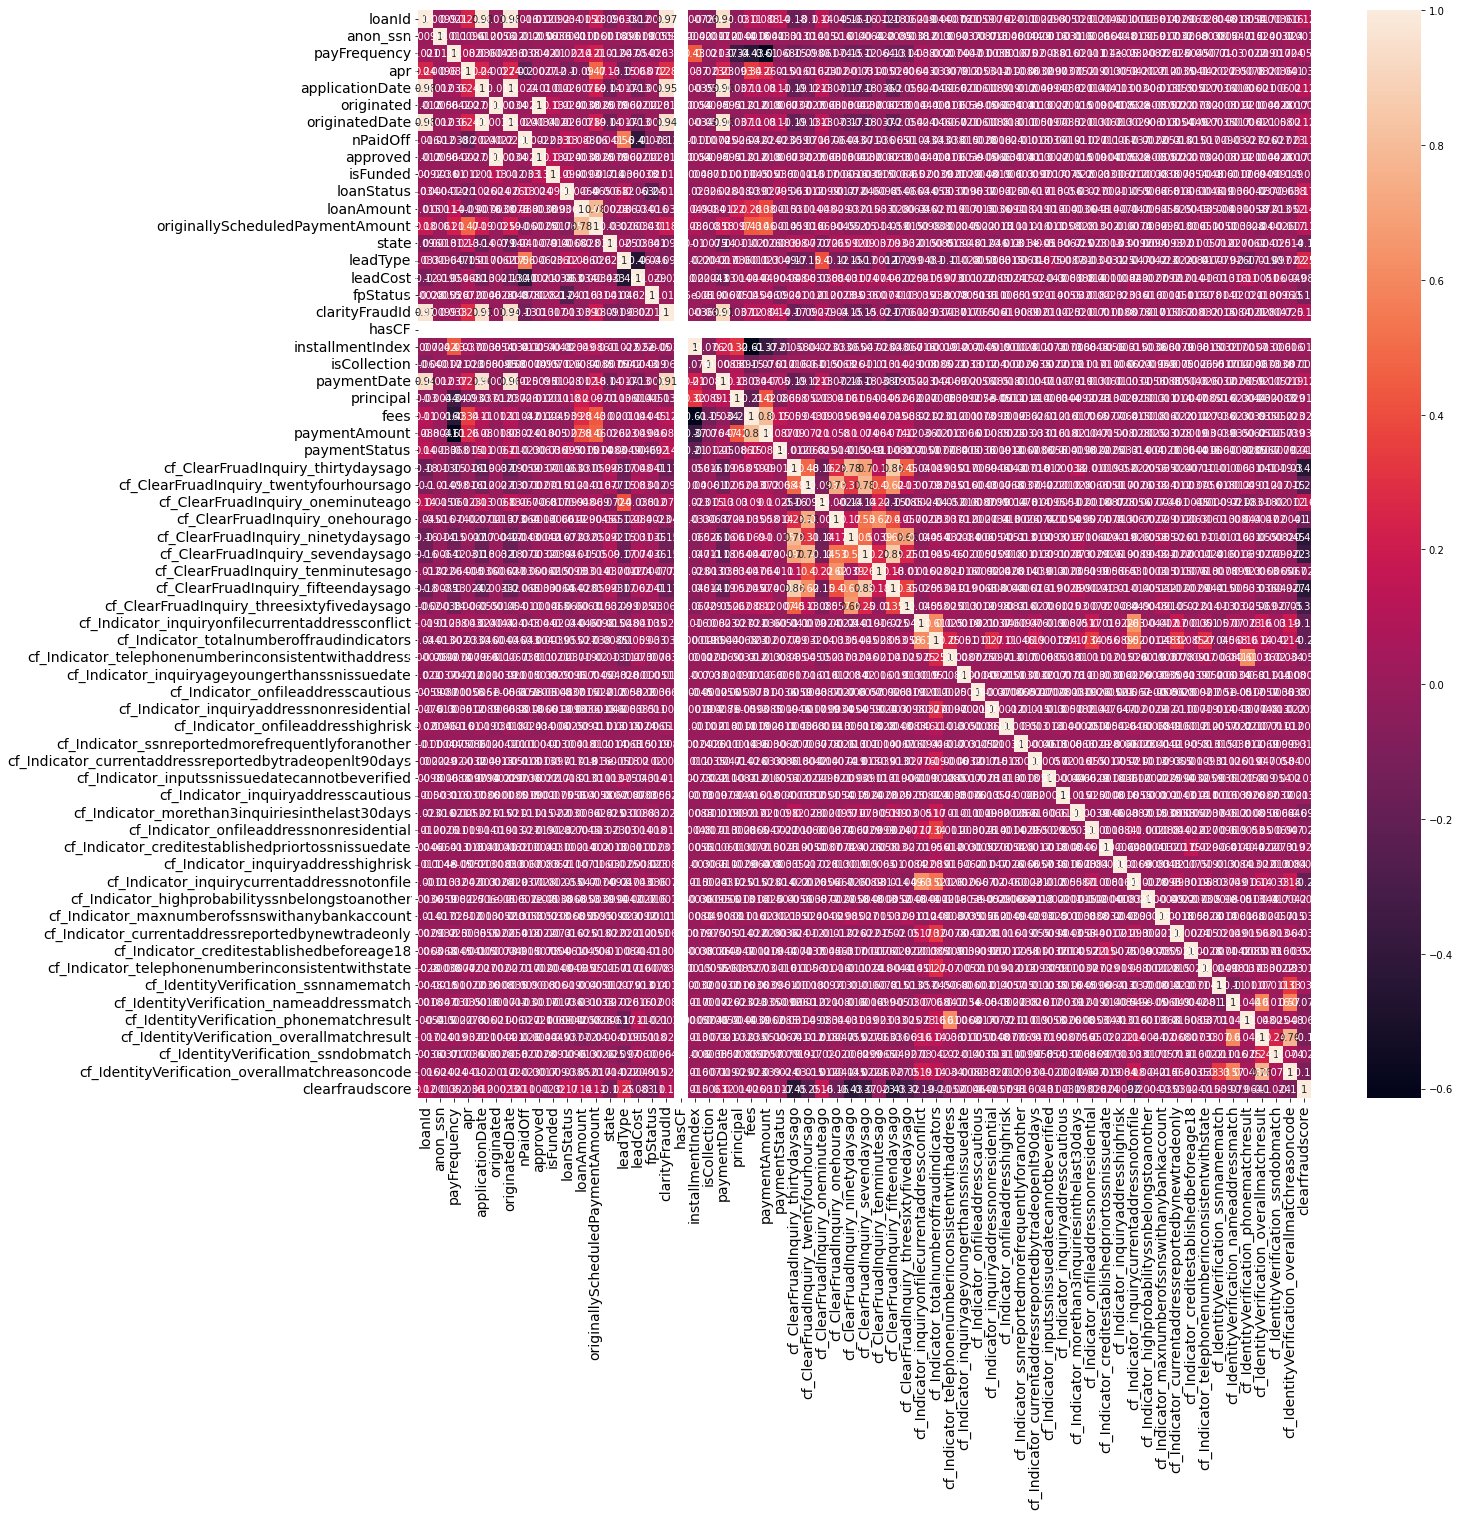

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True );
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
#remove the hasCF because hasCF only having class '1', which means that it does not provide any important information. 
df = df.drop(columns=['hasCF'])

In [ ]:
#removed the high score. 
df = df.drop(columns=['clarityFraudId'])
df = df.drop(columns=['originated'])
df = df.drop(columns=['originallyScheduledPaymentAmount'])
df = df.drop(columns=['principal'])
df = df.drop(columns=['cf_ClearFruadInquiry_ninetydaysago'])
df = df.drop(columns=['cf_ClearFruadInquiry_thirtydaysago'])
df = df.drop(columns=['cf_ClearFruadInquiry_sevendaysago'])
df = df.drop(columns=['cf_ClearFruadInquiry_twentyfourhoursago'])
df = df.drop(columns=['cf_IdentityVerification_overallmatchreasoncode'])
df = df.drop(columns=['originatedDate'])
df = df.drop(columns=['paymentDate'])
df = df.drop(columns=['applicationDate'])
df = df.drop(columns=['fees'])
df = df.drop(columns=['cf_Indicator_ssnreportedmorefrequentlyforanother'])

In [ ]:
df.corr()

loanId  anon_ssn  \
loanId                                              1.000000  0.009940   
anon_ssn                                            0.009940  1.000000   
payFrequency                                        0.020936  0.010762   
apr                                                 0.237844  0.009560   
nPaidOff                                            0.016029 -0.011560   
approved                                           -0.012487 -0.005638   
isFunded                                            0.009165 -0.003556   
loanStatus                                          0.034205  0.000414   
loanAmount                                         -0.015328  0.001090   
state                                              -0.096139  0.001821   
leadType                                            0.032577  0.009637   
leadCost                                           -0.117124 -0.019235   
fpStatus                                           -0.002799 -0.000549   
installmentIndex                                   -0.007212  0.004205   
isCollection                                       -0.064186 -0.000168   
paymentAmount                                       0.087572 -0.004110   
paymentStatus                                       0.142938  0.003277   
cf_ClearFruadInquiry_oneminuteago                   0.142659  0.014834   
cf_ClearFruadInquiry_onehourago                    -0.044824 -0.016077   
cf_ClearFruadInquiry_tenminutesago                 -0.011841 -0.022278   
cf_ClearFruadInquiry_fifteendaysago                -0.176491 -0.008544   
cf_ClearFruadInquiry_threesixtyfivedaysago         -0.061617 -0.000379   
cf_Indicator_inquiryonfilecurrentaddressconflict    0.019380 -0.011697   
cf_Indicator_totalnumberoffraudindicators          -0.043838 -0.013344   
cf_Indicator_telephonenumberinconsistentwithadd... -0.000760 -0.009727   
cf_Indicator_inquiryageyoungerthanssnissuedate     -0.021149  0.003695   
cf_Indicator_onfileaddresscautious                  0.005945 -0.008698   
cf_Indicator_inquiryaddressnonresidential           0.007579 -0.012523   
cf_Indicator_onfileaddresshighrisk                  0.020098  0.004644   
cf_Indicator_currentaddressreportedbytradeopenl... -0.002238  0.002913   
cf_Indicator_inputssnissuedatecannotbeverified      0.009759 -0.001611   
cf_Indicator_inquiryaddresscautious                 0.005016 -0.003062   
cf_Indicator_morethan3inquiriesinthelast30days     -0.022807 -0.015527   
cf_Indicator_onfileaddressnonresidential            0.012437 -0.002566   
cf_Indicator_creditestablishedpriortossnissuedate   0.004619  0.006367   
cf_Indicator_inquiryaddresshighrisk                 0.010667  0.004775   
cf_Indicator_inquirycurrentaddressnotonfile        -0.001000 -0.013498   
cf_Indicator_highprobabilityssnbelongstoanother     0.003580  0.005874   
cf_Indicator_maxnumberofssnswithanybankaccount     -0.014113 -0.017161   
cf_Indicator_currentaddressreportedbynewtradeonly   0.002873  0.003229   
cf_Indicator_creditestablishedbeforeage18           0.006317  0.006819   
cf_Indicator_telephonenumberinconsistentwithstate   0.028372 -0.000377   
cf_IdentityVerification_ssnnamematch                0.004833 -0.001453   
cf_IdentityVerification_nameaddressmatch            0.001817  0.004656   
cf_IdentityVerification_phonematchresult           -0.005432 -0.015428   
cf_IdentityVerification_overallmatchresult          0.016901  0.023557   
cf_IdentityVerification_ssndobmatch                 0.003574 -0.003665   
clearfraudscore                                     0.118732  0.001281   

                                                    payFrequency       apr  \
loanId                                                  0.020936  0.237844   
anon_ssn                                                0.010762  0.009560   
payFrequency                                            1.000000  0.082176   
apr                                                     0.082176  1.000000   
nPaidOff                             

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]),
 [Text(0, 0.5, 'loanId'),
  Text(0, 1.5, 'anon_ssn'),
  Text(0, 2.5, 'payFrequency'),
  Text(0, 3.5, 'apr'),
  Text(0, 4.5, 'nPaidOff'),
  Text(0, 5.5, 'approved'),
  Text(0, 6.5, 'isFunded'),
  Text(0, 7.5, 'loanStatus'),
  Text(0, 8.5, 'loanAmount'),
  Text(0, 9.5, 'state'),
  Text(0, 10.5, 'leadType'),
  Text(0, 11.5, 'leadCost'),
  Text(0, 12.5, 'fpStatus'),
  Text(0, 13.5, 'installmentIndex'),
  Text(0, 14.5, 'isCollection'),
  Text(0, 15.5, 'paymentAmount'),
  Text(0, 16.5, 'paymentStatus'),
  Text(0, 17.5, 'cf_ClearFruadInquiry_oneminuteago'),
  Text(0, 18.5, 'cf_ClearFruadInquiry_onehourago'),
  Text(0, 19.5, 'cf_ClearFruadInquiry_tenminutesago'),
  Text

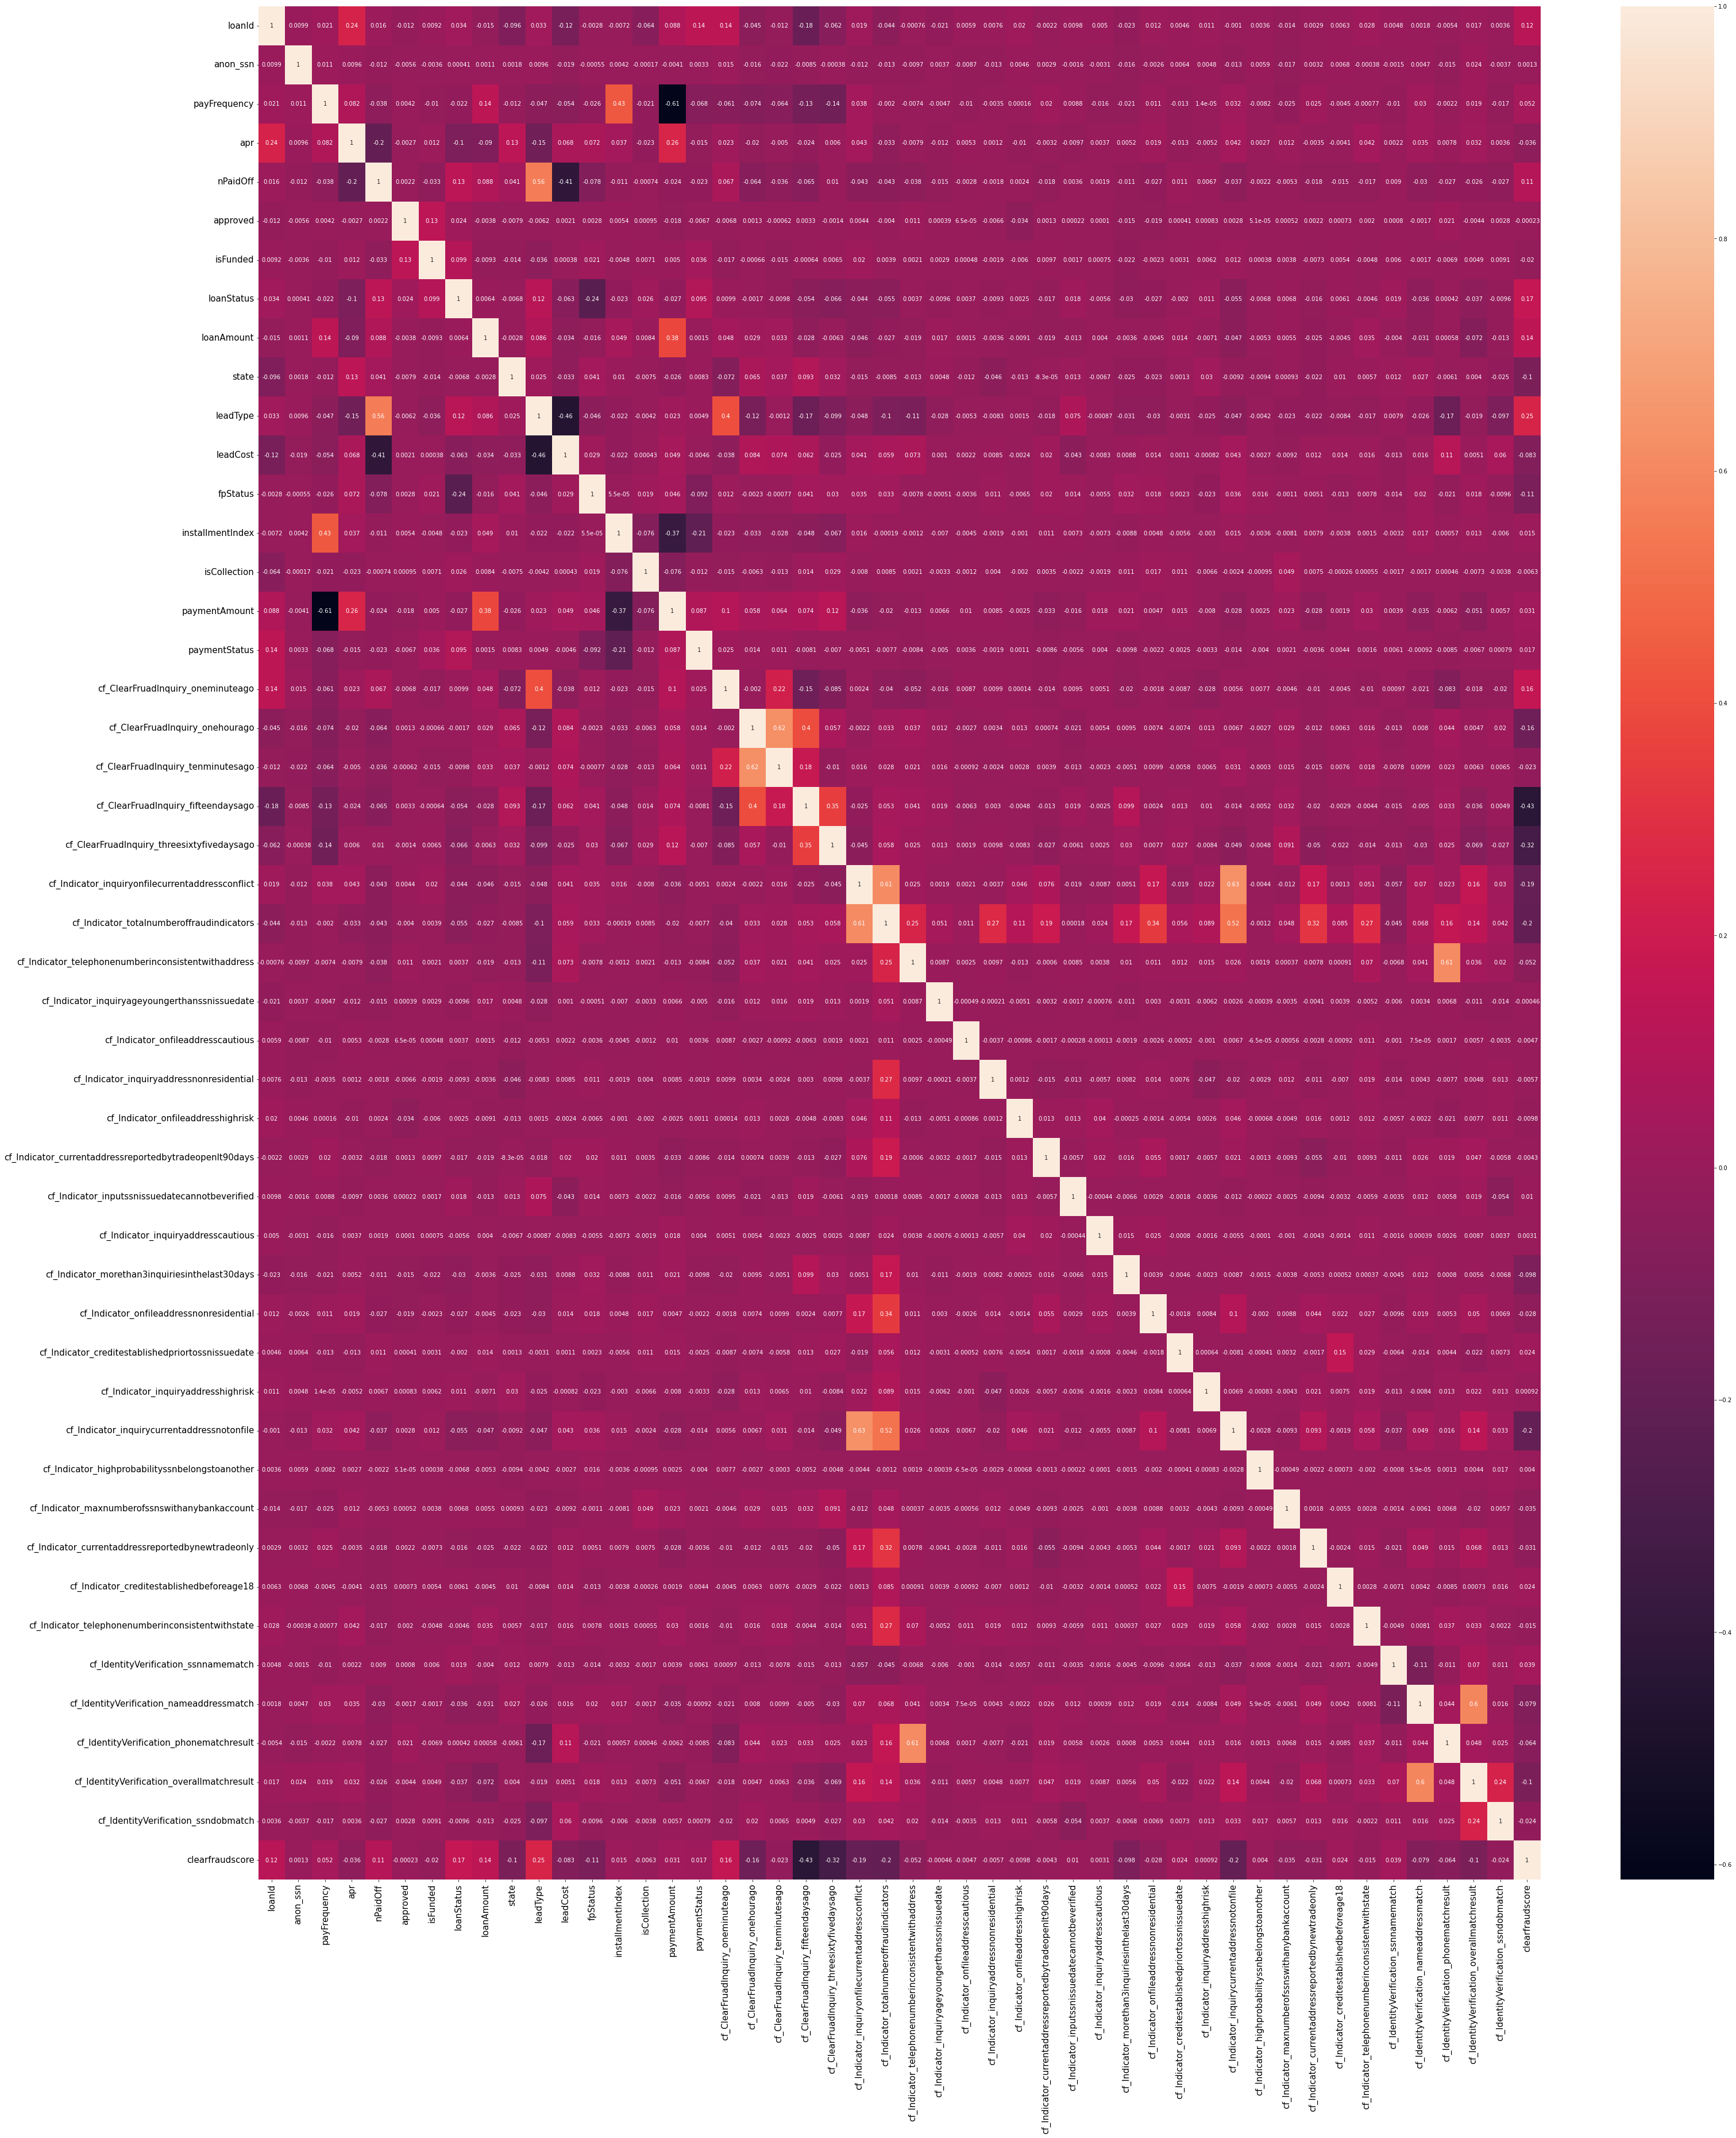

In [ ]:
plt.figure(figsize=(50,60))
sns.heatmap(df.corr(), annot=True );
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Significance Level

In [ ]:
#Using OLS for finding the p value to check the significant features 
import statsmodels.api as sm

model = sm.OLS(df['payFrequency'], df[['loanId', 'anon_ssn','nPaidOff', 'approved', 'isFunded', 'loanStatus', 'loanAmount',
                                   'state','leadType','leadCost','fpStatus','installmentIndex','isCollection','paymentAmount', 'paymentAmount','paymentStatus',
                                   'cf_ClearFruadInquiry_oneminuteago','cf_ClearFruadInquiry_onehourago','cf_ClearFruadInquiry_tenminutesago','cf_ClearFruadInquiry_fifteendaysago','cf_ClearFruadInquiry_threesixtyfivedaysago',
                                   'cf_Indicator_inquiryonfilecurrentaddressconflict','cf_Indicator_totalnumberoffraudindicators','cf_Indicator_telephonenumberinconsistentwithaddress','cf_Indicator_inquiryageyoungerthanssnissuedate',
                                   'cf_Indicator_onfileaddresscautious','cf_Indicator_onfileaddresshighrisk','cf_Indicator_currentaddressreportedbytradeopenlt90days',
                                   'cf_Indicator_inputssnissuedatecannotbeverified','cf_Indicator_inquiryaddresscautious','cf_Indicator_morethan3inquiriesinthelast30days','cf_Indicator_onfileaddressnonresidential','cf_Indicator_creditestablishedpriortossnissuedate',
                                   'cf_Indicator_inquiryaddresshighrisk','cf_Indicator_inquirycurrentaddressnotonfile','cf_Indicator_highprobabilityssnbelongstoanother','cf_Indicator_maxnumberofssnswithanybankaccount','cf_Indicator_currentaddressreportedbynewtradeonly',
                                   'cf_Indicator_creditestablishedbeforeage18','cf_Indicator_telephonenumberinconsistentwithstate','cf_IdentityVerification_ssnnamematch','cf_IdentityVerification_phonematchresult','cf_IdentityVerification_overallmatchresult',
                                   'cf_IdentityVerification_ssndobmatch','clearfraudscore','cf_Indicator_inquiryaddressnonresidential']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           payFrequency   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                          2.534e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:49:35   Log-Likelihood:                     -4.2110e+05
No. Observations:              254385   AIC:                                  8.423e+05
Df Residuals:                  254340   BIC:                                  8.428e+05
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
loanId                                                  3.133e-05   6.22e-07     50.338      0.000    3.01e-05    3.25e-05
anon_ssn                                                 2.66e-06   6.16e-07      4.317      0.000    1.45e-06    3.87e-06
nPaidOff                                                  -0.3055      0.006    -47.565      0.000      -0.318      -0.293
approved                                                  19.5745      0.068    287.719      0.000      19.441      19.708
isFunded                                                  -0.1473      0.048     -3.060      0.002      -0.242      -0.053
loanStatus                                                -0.0368      0.002    -22.866      0.000      -0.040      -0.034
loanAmount                                                35.1120      0.123    285.196      0.000      34.871      35.353
state                                                     -0.0022      0.000     -8.587      0.000      -0.003      -0.002
leadType                                                  -0.0827      0.003    -27.867      0.000      -0.089      -0.077
leadCost                                                  -6.1303      0.198    -30.975      0.000      -6.518      -5.742
fpStatus                                                   0.0203      0.007      2.958      0.003       0.007       0.034
installmentIndex                                           4.1176      0.043     95.670      0.000       4.033       4.202
isCollection                                              -0.9319      0.020    -47.590      0.000      -0.970      -0.894
paymentAmount                                           -106.4049      0.235   -453.008      0.000    -106.865    -105.945
paymentAmount                                           -106.4049      0.235   -453.008      0.000    -106.865    -105.945
paymentStatus                                              0.0286      0.002     12.263      0.000       0.024       0.033
cf_ClearFruadInquiry_oneminuteago                          0.0046      0.035      0.132      0.895      -0.063       0.073
cf_ClearFruadInquiry_onehourago                           -0.4958      0.039    -12.659      0.000      -0.573      -0.419
cf_ClearFruadInquiry_tenminutesago                        -0.1926      0.049     -3.905      0.000      -0.289      -0.096
cf_ClearFruadInquiry_fifteendaysago                       -0.8324      0.042    -19.783      0.000      -0.915      -0.750
cf_ClearFruadInquiry_threesixtyfivedaysago                -0.6949      0.048    -14.564      0.000      -0.788      -0.601
cf_Indicator_inquiryonfilecurren

based on the OLS above, majority of the features are having P-value of less than 0.05, which means that the features are significant to the target variable. However,there are some variables that are not significant. Therefore we can remove these.  we dont want to remove ID. 

In [ ]:
df = df.drop(columns=['cf_ClearFruadInquiry_oneminuteago'])
df = df.drop(columns=['cf_Indicator_inquiryageyoungerthanssnissuedate'])
df = df.drop(columns=['cf_Indicator_creditestablishedpriortossnissuedate'])
df = df.drop(columns=['cf_Indicator_maxnumberofssnswithanybankaccount'])
df = df.drop(columns=['cf_IdentityVerification_phonematchresult'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254385 entries, 77 to 558325
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  254385 non-null  int64  
 1   anon_ssn                                                254385 non-null  int64  
 2   payFrequency                                            254385 non-null  int64  
 3   apr                                                     254385 non-null  float64
 4   nPaidOff                                                254385 non-null  int64  
 5   approved                                                254385 non-null  int64  
 6   isFunded                                                254385 non-null  float64
 7   loanStatus                                              254385 non-null  int64  
 8   loanAmount             

In [ ]:
df.to_csv("/content/drive/MyDrive/NEWDATASET.csv")

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/NEWDATASET.csv')

#Check for the class of the target variable. 

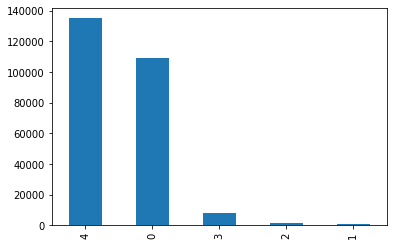

In [ ]:
df['payFrequency'].value_counts().plot.bar()
plt.show()

In [ ]:
target_values = df['payFrequency'].value_counts()
print(target_values)

4    134998
0    108882
3      7934
2      1348
1      1223
Name: payFrequency, dtype: int64


In [ ]:
#remove the classes that less than 5000

In [ ]:
class_counts = df['payFrequency'].value_counts()

In [ ]:
valid_classes = class_counts[class_counts >= 5000].index.tolist()

In [ ]:
new_df = df[df['payFrequency'].isin(valid_classes)]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251814 entries, 77 to 558325
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  251814 non-null  int64  
 1   anon_ssn                                                251814 non-null  int64  
 2   payFrequency                                            251814 non-null  int64  
 3   apr                                                     251814 non-null  float64
 4   nPaidOff                                                251814 non-null  int64  
 5   approved                                                251814 non-null  int64  
 6   isFunded                                                251814 non-null  float64
 7   loanStatus                                              251814 non-null  int64  
 8   loanAmount             

In [ ]:
#double check if the class removed. 

In [ ]:
target_values = new_df['payFrequency'].value_counts()
print(target_values)

4    134998
0    108882
3      7934
Name: payFrequency, dtype: int64


#Class Balancing

##Random Oversampling

In [ ]:
X = new_df.drop('payFrequency', axis=1)
y = new_df['payFrequency']

In [ ]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)

over_sampler = RandomOverSampler(sampling_strategy='not majority')

X_resampled, y_resampled = over_sampler.fit_resample(X, y_encoded)


In [ ]:
X_resampled.shape 

(404994, 42)

In [ ]:
y_resampled.shape

(404994,)

# Model Splitting 80:20

In [ ]:
# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(323995, 42) (323995,) (80999, 42) (80999,)


#Model Building Experiment 1

In [ ]:
# Create a logistic regression classifier
lr1 = LogisticRegression(penalty='l2', C=1.0, solver='newton-cholesky', max_iter=1000, )

lr1.fit(X_train, y_train)

print(lr1.coef_)

[[-8.54703668e-05  3.32212201e-06 -1.62415234e+00  3.73887625e-01
  -2.61141206e+00  5.12760280e-01 -2.17424677e-03 -2.56771125e+01
   1.02218726e-02  9.08955265e-03  1.30878366e+01  2.13145543e-02
  -6.59624290e+00  5.04134124e-01  9.14649754e+01 -3.01258953e-02
   7.19766551e-01  2.71719762e-01  6.97937047e-01 -1.21176526e-01
  -3.35684206e-02  1.03580214e-01 -4.10908908e-02  2.80690766e+00
  -9.93599633e-02  9.62100905e-03  2.62082747e-01 -5.13598907e-02
   3.35219052e+00 -2.50190083e-02 -2.29093182e-01 -1.53960177e-01
  -3.58528958e-02  2.21541923e+00 -7.33347346e-02  6.15493184e-02
  -5.94936408e-02  5.20167672e-01  5.13839086e-02 -3.26135133e-03
   8.63197833e-02 -4.07212321e-01]
 [ 1.48157346e-04 -1.18575418e-05 -2.78849653e+00 -5.17961462e-01
   2.43578400e+00 -3.10204865e-01  2.52264151e-02 -1.82846223e+01
  -3.69156802e-03  1.30282449e-01 -9.94327793e+00  5.90822920e-02
  -7.94198604e+00  7.62662630e-01  1.12352629e+02 -6.12954905e-02
  -9.70102463e-01  1.55845325e-01  8.6722

In [ ]:
lr1_pred = lr1.predict(X_test)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr1, X_train, y_train, cv=5)

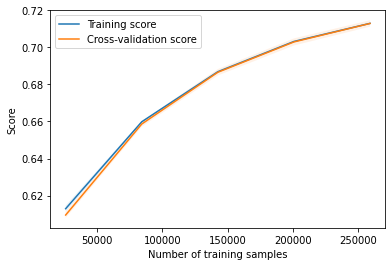

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Number of training samples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

In [ ]:
print("Training Scores:")
print(train_scores)

print("Cross-Validation Scores:")
print(test_scores)

Training Scores:
[[0.6161889  0.61206065 0.61206065 0.61206065 0.61206065]
 [0.65909684 0.65954795 0.66018899 0.66018899 0.66018899]
 [0.68790729 0.68645524 0.68735313 0.68635002 0.68635002]
 [0.70401641 0.7029909  0.70327466 0.70275195 0.70311535]
 [0.7134678  0.71261516 0.71267689 0.71272705 0.71361827]]
Cross-Validation Scores:
[[0.61034893 0.60865137 0.60939212 0.611815   0.60715443]
 [0.6597324  0.65788052 0.65788052 0.66084353 0.65681569]
 [0.68710937 0.68641491 0.68531922 0.68957854 0.68456303]
 [0.7026343  0.7035911  0.70056637 0.7062609  0.70183182]
 [0.71272705 0.71314372 0.71126098 0.71613759 0.71152333]]


In [ ]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, lr1_pred)
precision = precision_score(y_test, lr1_pred, average='macro')
recall = recall_score(y_test, lr1_pred, average='macro')
f1 = f1_score(y_test, lr1_pred, average='macro')
conf_matrix = confusion_matrix(y_test, lr1_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.7201693848072198
Precision: 0.7204608065621243
Recall: 0.7204050121724895
F1-score: 0.716378889677062
Confusion matrix:
 [[14091 11334  1657]
 [ 6122 19526  1281]
 [ 1371   901 24716]]


## Permutation Importance

In [ ]:
perm = PermutationImportance(lr1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=50)


The paymentAmoung, Loan Amoung, apr, loanID and installmentIndex are the top 5 contributes to the model. We will remove the lowest scores to see if it can help improve the model accuracy. 

In [ ]:
new_df = new_df.drop(columns=['cf_Indicator_inquiryaddresscautious'])
new_df = new_df.drop(columns=['isFunded'])
new_df = new_df.drop(columns=['cf_Indicator_creditestablishedbeforeage18'])
new_df = new_df.drop(columns=['cf_Indicator_telephonenumberinconsistentwithaddress'])
new_df = new_df.drop(columns=['cf_Indicator_currentaddressreportedbynewtradeonly'])
new_df = new_df.drop(columns=['cf_Indicator_onfileaddresscautious'])
new_df = new_df.drop(columns=['cf_IdentityVerification_overallmatchresult'])
new_df = new_df.drop(columns=['cf_Indicator_highprobabilityssnbelongstoanother'])
new_df = new_df.drop(columns=['approved'])
new_df = new_df.drop(columns=['cf_Indicator_inquirycurrentaddressnotonfile'])
new_df = new_df.drop(columns=['fpStatus'])
new_df = new_df.drop(columns=['cf_ClearFruadInquiry_onehourago'])
new_df = new_df.drop(columns=['cf_ClearFruadInquiry_tenminutesago'])



# Model Building Experiment 2  

##Oversampling 2

In [ ]:
X = new_df.drop('payFrequency', axis=1)
y = new_df['payFrequency']

In [ ]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)

over_sampler = RandomOverSampler(sampling_strategy='not majority')

X_resampled, y_resampled = over_sampler.fit_resample(X, y_encoded)

In [ ]:
X_resampled.shape 

(404994, 29)

##Train Test Split 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(323995, 29) (323995,) (80999, 29) (80999,)


##Logistic regression 2

In [ ]:
lr2 = LogisticRegression(penalty='l2', C=1.0, solver='newton-cholesky', max_iter=1000, )

lr2.fit(X_train, y_train)

print(lr2.coef_)

[[-8.35923852e-05  4.01585091e-06 -1.64162218e+00  3.74548857e-01
  -8.80239206e-04 -2.56396717e+01  1.07615460e-02  1.02773900e-02
   1.36200794e+01 -6.53828371e+00  5.44515094e-01  9.20904895e+01
  -2.92415619e-02  1.06864358e+00 -2.16979599e-01 -5.75242810e-02
   7.19347499e-02 -9.88744194e-02  2.12027640e-02  2.46480045e-01
  -5.69472391e-02 -1.86017023e-02 -2.14015176e-01 -1.93294366e-01
  -3.62234883e-02  5.30812925e-01  5.13789797e-02  9.17520507e-02
  -3.55993950e-01]
 [ 1.44834913e-04 -1.32199116e-05 -2.77670638e+00 -5.30215912e-01
   2.28553158e-02 -1.82680592e+01 -3.62962894e-03  1.28077989e-01
  -1.02339697e+01 -7.98177836e+00  7.28708884e-01  1.11870575e+02
  -6.26970407e-02  4.48676017e-01  3.02447237e+00 -1.05168259e-01
   2.50752613e-01  5.82662400e-02  1.83591111e-01 -7.59763008e-01
  -5.88712973e-01  1.03623851e-01  2.45556062e-01  1.77429413e-01
   2.06795238e-01 -7.02288372e-01 -1.04205689e-01 -9.36585686e-02
   7.78945103e-01]
 [-6.02977998e-05  1.10989084e-05  4.3

In [ ]:
lr2_pred = lr2.predict(X_test)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr2, X_train, y_train, cv=5)

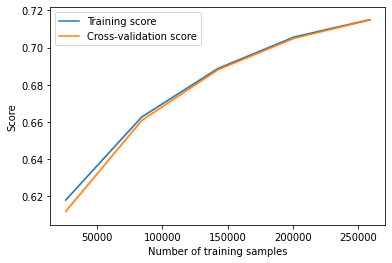

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Number of training samples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

In [ ]:
print("Training Scores:")
print(train_scores)

print("Cross-Validation Scores:")
print(test_scores)

Training Scores:
[[0.61564875 0.61858096 0.61858096 0.61858096 0.61858096]
 [0.66040267 0.66345355 0.66325174 0.66325174 0.66325174]
 [0.68782312 0.68998366 0.68908577 0.6883843  0.6883843 ]
 [0.70488261 0.70620184 0.70614708 0.7055248  0.70576873]
 [0.71421241 0.7154007  0.71490301 0.71484514 0.71596012]]
Cross-Validation Scores:
[[0.61349712 0.61059584 0.61249402 0.6138212  0.60894458]
 [0.66337443 0.66068921 0.65994846 0.66204725 0.65811201]
 [0.69135326 0.68781926 0.68647664 0.68939335 0.6855507 ]
 [0.70638436 0.7052578  0.70354481 0.70664671 0.70331332]
 [0.71666229 0.71491844 0.71414682 0.71626105 0.71281964]]


In [ ]:
accuracy = accuracy_score(y_test, lr2_pred)
precision = precision_score(y_test, lr2_pred, average='macro')
recall = recall_score(y_test, lr2_pred, average='macro')
f1 = f1_score(y_test, lr2_pred, average='macro')
conf_matrix = confusion_matrix(y_test, lr2_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.7236509092704848
Precision: 0.724657339896433
Recall: 0.7238924897304537
F1-score: 0.7199375623458515
Confusion matrix:
 [[14140 11356  1586]
 [ 5932 19768  1229]
 [ 1394   887 24707]]


As compared with previous results, the evaluation results seems to improve after removing the not important variables. 

## Permutation Importance

In [ ]:
perm = PermutationImportance(lr2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=50)

Drop those features with low score. 

In [ ]:
new_df = new_df.drop(columns=['cf_Indicator_inquiryaddressnonresidential'])
new_df = new_df.drop(columns=['cf_Indicator_inquiryaddresshighrisk'])
new_df = new_df.drop(columns=['cf_Indicator_inputssnissuedatecannotbeverified'])
new_df = new_df.drop(columns=['cf_Indicator_inquiryonfilecurrentaddressconflict'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251814 entries, 77 to 558325
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   loanId                                                  251814 non-null  int64  
 1   anon_ssn                                                251814 non-null  int64  
 2   payFrequency                                            251814 non-null  int64  
 3   apr                                                     251814 non-null  float64
 4   nPaidOff                                                251814 non-null  int64  
 5   loanStatus                                              251814 non-null  int64  
 6   loanAmount                                              251814 non-null  float64
 7   state                                                   251814 non-null  int64  
 8   leadType               

# Model Building Experiment 3

## Random Oversampling

In [ ]:
X = new_df.drop('payFrequency', axis=1)
y = new_df['payFrequency']

In [ ]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)

over_sampler = RandomOverSampler(sampling_strategy='not majority')

X_resampled, y_resampled = over_sampler.fit_resample(X, y_encoded)

In [ ]:
X_resampled.shape 

(404994, 25)

## Train Test Split 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(323995, 25) (323995,) (80999, 25) (80999,)


## Logistic Regression 3

In [ ]:
lr3 = LogisticRegression(penalty='l2', C=1.0, solver='newton-cholesky', max_iter=1000 )

lr3.fit(X_train, y_train)

print(lr3.coef_)

[[-8.47219120e-05  4.12818827e-06 -1.66566066e+00  3.70802613e-01
   1.33751566e-03 -2.53147938e+01  1.14876825e-02  6.09983852e-03
   1.34821824e+01 -6.55977831e+00  5.50410360e-01  9.17610264e+01
  -2.37037486e-02  1.07921329e+00 -2.17741333e-01 -1.25764372e-01
   3.55447757e-02  2.97529456e-01 -1.24993279e-02 -1.80417592e-01
  -1.41488229e-02  5.14958836e-01  5.05810850e-02  9.13068443e-02
  -4.03679387e-01]
 [ 1.46180156e-04 -1.28122797e-05 -2.80114009e+00 -5.24740174e-01
   1.94482653e-02 -1.87135700e+01 -4.29937228e-03  1.29705903e-01
  -1.03015673e+01 -8.01038675e+00  6.93434474e-01  1.13135094e+02
  -6.87118522e-02  4.58155745e-01  3.14310522e+00  1.00515320e-01
   1.54835346e-01 -8.00188968e-01  1.41422574e-01  2.41706004e-01
   2.26770912e-01 -6.36241462e-01 -1.03150284e-01 -8.88657723e-02
   8.68658912e-01]
 [-5.96331950e-05  1.07737877e-05  4.34925971e+00  1.40870965e-01
  -3.02086441e-02  3.98113473e+01 -1.55974340e-02 -1.95541743e-01
  -7.98546873e+00  1.35606087e+01 -1.3

In [ ]:
lr3_pred = lr3.predict(X_test)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr3, X_train, y_train, cv=5)

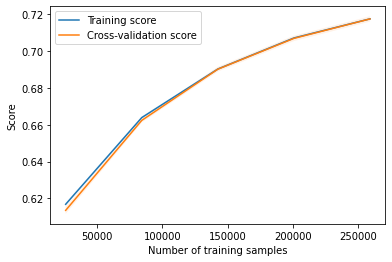

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Number of training samples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

In [ ]:
print("Training Scores:")
print(train_scores)

print("Cross-Validation Scores:")
print(test_scores)

Training Scores:
[[0.61831089 0.6163818  0.6163818  0.6163818  0.6163818 ]
 [0.66348916 0.66293122 0.6643795  0.6643795  0.6643795 ]
 [0.69143571 0.69025723 0.69035544 0.68979426 0.68979426]
 [0.70804377 0.70683904 0.70727713 0.70699337 0.70690874]
 [0.71813994 0.7172873  0.71756123 0.7170944  0.71798948]]
Cross-Validation Scores:
[[0.61470084 0.61414528 0.61294156 0.61558049 0.60999398]
 [0.66266455 0.66334357 0.66164601 0.66368308 0.66061205]
 [0.69024213 0.69067424 0.68886866 0.69241809 0.68896125]
 [0.7057362  0.70794302 0.70572077 0.7094091  0.70615287]
 [0.71590611 0.71880739 0.7170481  0.7197179  0.71638451]]


In [ ]:
accuracy = accuracy_score(y_test, lr3_pred)
precision = precision_score(y_test, lr3_pred, average='macro')
recall = recall_score(y_test, lr3_pred, average='macro')
f1 = f1_score(y_test, lr3_pred, average='macro')
conf_matrix = confusion_matrix(y_test, lr3_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.7247373424363264
Precision: 0.7254594472233945
Recall: 0.724979204685901
F1-score: 0.7208589045146262
Confusion matrix:
 [[14169 11276  1637]
 [ 5866 19807  1256]
 [ 1396   865 24727]]


In [ ]:
new_df.to_csv("/content/drive/MyDrive/NEWDATASET.csv")

In [ ]:
new_df.info()

# Summary

Overall task is completed in 13 steps as mentioned in the beginning. The thrid experimente model manage to achieve the highest accuracy, precision, recall and f1 score of 0.725, 0.725, 0.725 and 0.721 respectively. With this output, it is proven that lesser number of features can actually improve the model performance.  However, there are some approaches that can be change in order to achieve higher accuracy, the approaches is listed below.

1. Hyperparameter Tuning

2. Use different appoaches on outlier treatment such as using imputation techniques

3. Use different normalization technique such as standardization or log transformation. 